# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Dataset Load (Train / Test)

In [2]:
img_size = 128
batch_size = 32

train_dir = "dataset/train"
test_dir = "dataset/test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

print("Classes:", train_data.class_indices)


Found 655 images belonging to 17 classes.
Found 183 images belonging to 17 classes.
Classes: {'Darier_s disease': 0, 'Muehrck-e_s lines': 1, 'aloperia areata': 2, 'beau_s lines': 3, 'bluish nail': 4, 'clubbing': 5, 'eczema': 6, 'half and half nailes (Lindsay_s nails)': 7, 'koilonychia': 8, 'leukonychia': 9, 'onycholycis': 10, 'pale nail': 11, 'red lunula': 12, 'splinter hemmorrage': 13, 'terry_s nail': 14, 'white nail': 15, 'yellow nails': 16}


# Build CNN Model

In [3]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu',
                 input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(train_data.num_classes, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


C:\Users\PARTH\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 17)                  │           2,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,833 (12.61 MB)

 Trainable params: 3,306,833 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [4]:
epochs = 15

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=epochs
)


Epoch 1/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 506ms/step - accuracy: 0.0763 - loss: 2.8514 - val_accuracy: 0.0546 - val_loss: 2.8121
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 440ms/step - accuracy: 0.1069 - loss: 2.7928 - val_accuracy: 0.1038 - val_loss: 2.7455
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 371ms/step - accuracy: 0.1344 - loss: 2.7304 - val_accuracy: 0.1858 - val_loss: 2.6630
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 362ms/step - accuracy: 0.1618 - loss: 2.6991 - val_accuracy: 0.1530 - val_loss: 2.6631
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 391ms/step - accuracy: 0.1557 - loss: 2.6250 - val_accuracy: 0.1530 - val_loss: 2.6024
Epoch 6/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 428ms/step - accuracy: 0.1802 - loss: 2.6141 - val_accuracy: 0.2568 - val_loss: 2.4923
Epoch 7/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 378ms/step - accuracy: 0.2137 - loss: 2.5804 - val_accuracy: 0.2732 - val_loss: 2.4827
Epoch 8/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 362ms/step - accuracy: 0.2229 - loss: 2.4793 - val_accuracy: 

# Confusion Matrix

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


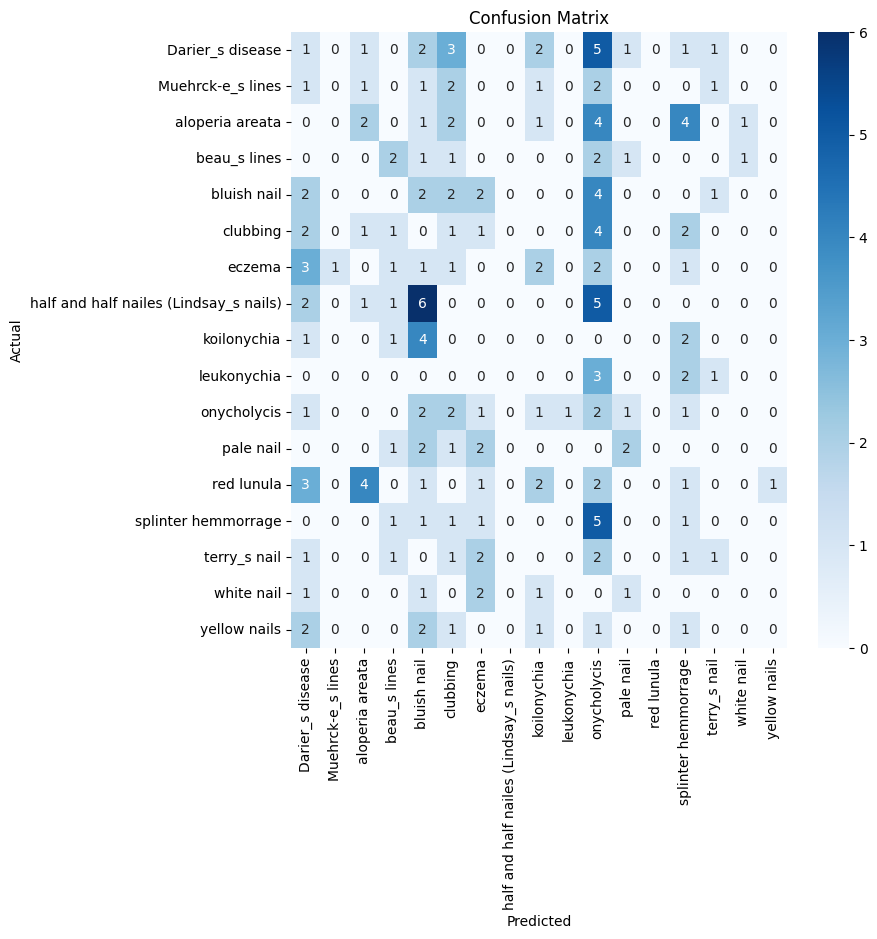

In [31]:
import itertools
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=list(test_data.class_indices.keys()),
            yticklabels=list(test_data.class_indices.keys()))
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


# Classification Report

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, 
      target_names=list(test_data.class_indices.keys())))


                                        precision    recall  f1-score   support

                      Darier_s disease       0.05      0.06      0.05        17
                     Muehrck-e_s lines       0.00      0.00      0.00         9
                       aloperia areata       0.20      0.13      0.16        15
                          beau_s lines       0.22      0.25      0.24         8
                           bluish nail       0.07      0.15      0.10        13
                              clubbing       0.06      0.08      0.07        12
                                eczema       0.00      0.00      0.00        12
half and half nailes (Lindsay_s nails)       0.00      0.00      0.00        15
                           koilonychia       0.00      0.00      0.00         8
                           leukonychia       0.00      0.00      0.00         6
                           onycholycis       0.05      0.17      0.07        12
                             pale nail 

C:\Users\PARTH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\PARTH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\PARTH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

# Evaluate Model

In [5]:
loss, accuracy = model.evaluate(test_data)

print("Test Accuracy:", accuracy * 100, "%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.3279 - loss: 2.0697
Test Accuracy: 32.786884903907776 %


#  Accuracy & Loss Graph

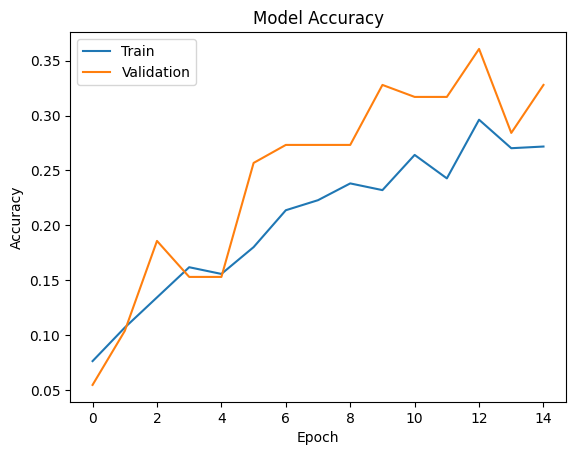

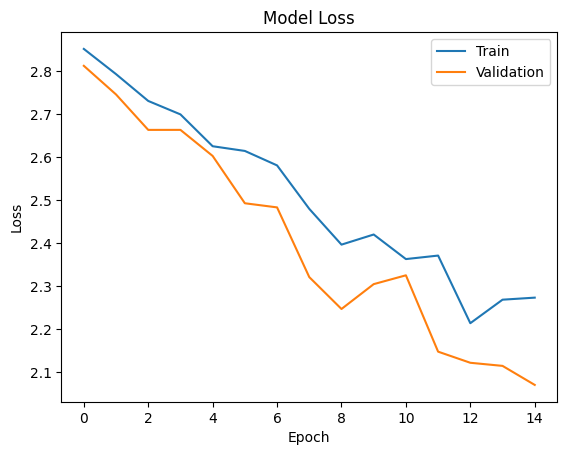

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()


# Save Model

In [7]:
model.save("nail_disease_model.h5")

print("Model Saved Successfully!")


Model Saved Successfully!


# Test on New Image 

In [11]:
from tensorflow.keras.preprocessing import image

img_path = "dataset/train/yellow nails/1.png"   #  test image path

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)

class_names = list(train_data.class_indices.keys())

predicted_class = class_names[np.argmax(prediction)]

print("Predicted Disease:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Predicted Disease: terry_s nail


# Prediction

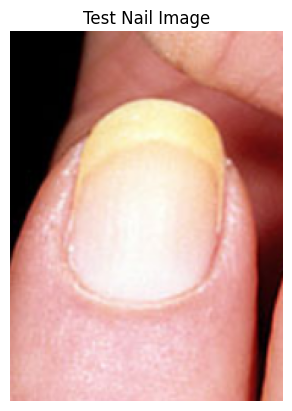

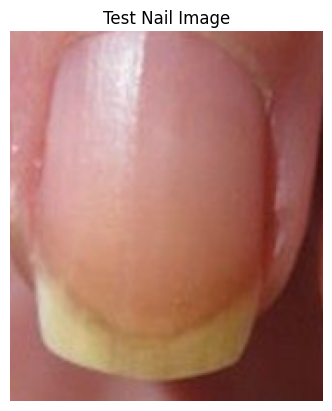

In [24]:
from PIL import Image
import matplotlib.pyplot as plt

img_path1 = "dataset/test/yellow nails/1.png"   
img_path = "dataset/test/yellow nails/2.png" 

img1 = Image.open(img_path1)

plt.imshow(img1)
plt.axis("off")
plt.title("Test Nail Image")
plt.show()


img = Image.open(img_path)

plt.imshow(img)
plt.axis("off")
plt.title("Test Nail Image")
plt.show()